# Predicting the Sale Price of Bulldozers Using Machine Learning

In this notebook, I have created a machine learning model that uses Scikit-Learn regression models to try and predict the sale price of bulldozers

## 1. Problem Definition
> Predicting the future sale price of a bulldozer, given it's characteristics and examples of the past sale prices

## 2. Data
The data is downloaded from the Kaggle bluebook for bulldozers: https://www.kaggle.com/c/bluebook-for-bulldozers/data
These are the 3 main files:
* `Train.csv` is the training set, which contains data through the end of 2011.
* `Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 201.
* `Test.csv`  is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 201

## 3. Evaluation
The evaluation metric for the competition is RMSLE (root mean squared log error) between the actual and predicted prices

For more:www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

## 4. Features


Kaggle provides a data dictionary for all the features of the dataset. You can view it on Google Sheets: https://docs.google.com/spreadsheets/d/1epM2r3tWJVC7lq14HPAvdy0y_jSI0F7s/edit?usp=sharing&ouid=117336473781673355164&rtpof=true&sd=truees

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

### Exploring the data

In [2]:
# Import training and test data
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [3]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

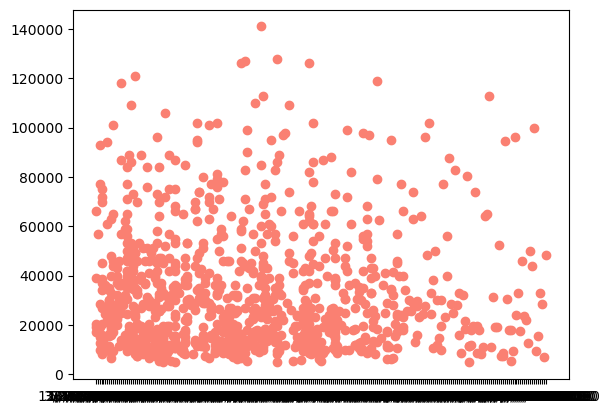

In [5]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000], color="salmon");

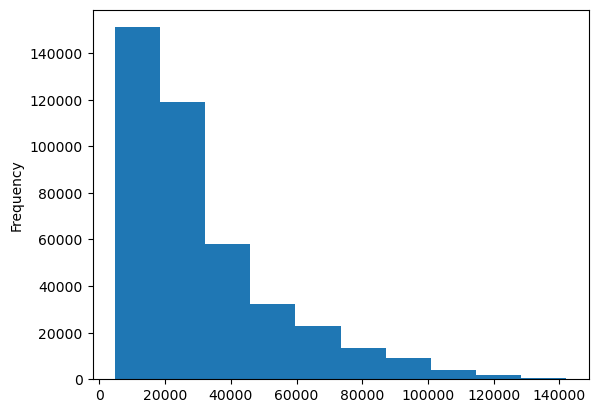

In [6]:
df.SalePrice.plot.hist();

### Parsing dates

In [7]:
# Import data again, but parsing dates this time 
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory = False,
                 parse_dates=["saledate"])

In [8]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

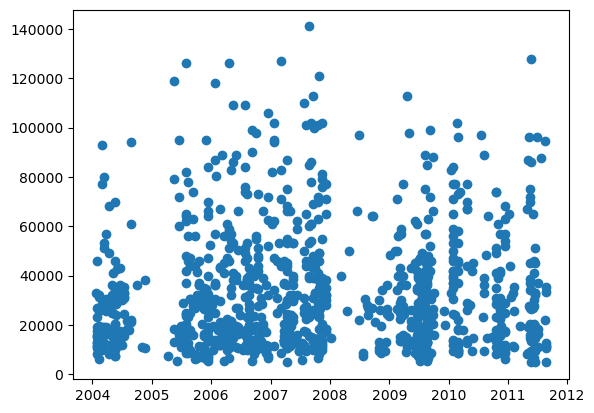

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [10]:
# Sort DataFrame by saledate
df.sort_values(by=["saledate"], ascending=True, inplace=True)

In [11]:
# Making a copy of the dataframe so that we always have a backup to work with
df_copy = df.copy()

### Add datetime parameters for `saledate` column

In [12]:
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month
df_copy["saleDay"] = df_copy.saledate.dt.day
df_copy["saleDayOfWeek"] = df_copy.saledate.dt.dayofweek
df_copy["saleDayOfYear"] = df_copy.saledate.dt.dayofyear

In [13]:
df_copy.drop("saledate", axis=1, inplace=True)

## 5. Modelling
Let's conduct data driven EDA and build a machine learning model

### Convert strings to categories
Since we have non-numeric data in the dataframe, we should convert it into pandas categories

In [14]:
# Find the columns which contain strings
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [15]:
pd.api.types.is_string_dtype(df_copy["UsageBand"])

False

In [16]:
# Turning all the string values into category values
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [18]:
df_copy.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

### Save preprocessed data 

In [19]:
df_copy.to_csv("data/bluebook-for-bulldozers/cat_temp.csv",
               index=False)

### Filling missing values

#### Filling missing numerical values

In [20]:
# Check the missing values 
df_copy.isnull().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [21]:
# Check which rows has missing values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [22]:
# Fill numeric rows with median
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing 
            df_copy[label + "_is_missing"] = pd.isnull(content)
            # Fill the missing values with the median
            df_copy[label] = content.fillna(content.median)

In [23]:
# Check if there's any null numeric values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

#### Filling the missing categorical values

In [24]:
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

auctioneerID
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
pd.Categorical(df_copy["Undercarriage_Pad_Width"]).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [26]:
# Fill missing values
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_copy[label+"_is_missing"] = pd.isnull(content)
        df_copy[label] = pd.Categorical(content).codes + 1 

## Fitting the model

Since we have converted the data to numeric and filled in all the missing values, we can build a machine learning model

### Splitting the data into train and validation splits

In [27]:
# Split the data based on the sale year
df_val = df_copy[df_copy.saleYear == 2012]
df_train = df_copy[df_copy.saleYear != 2012]

In [28]:
# Split data into X and Y
X_train = df_train.drop("SalePrice", axis=1)
Y_train = df_train["SalePrice"]
X_val = df_val.drop("SalePrice", axis=1)
Y_val = df_val["SalePrice"]

In [29]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building our evaluation function

In [30]:
def rmsle(Y_test, Y_preds)->float:
    """
    Calculates the Root mean squared log error between the predictions and the true label
    """
    return np.sqrt(mean_squared_log_error(Y_test, Y_preds))

# Create a model to predict on a few different levels
def show_scores(model)->dict:
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(Y_train, train_preds), 
              "Validation MAE": mean_absolute_error(Y_val, valid_preds),
              "Training RMSLE": rmsle(Y_train, train_preds),
              "Validation RMSLE": rmsle(Y_val, valid_preds),
              "Training R^2": r2_score(Y_train, train_preds),
              "Validation R^2": r2_score(Y_val, valid_preds)}
    return scores

## Testing our model on a subset of the data

In [31]:
%%time
# Since the model has around 400,000 rows, it would take too long to fit it on a model. 
# Therefore, we are only using a subset of the data.
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)
model.fit(X_train, Y_train) 

CPU times: total: 52.5 s
Wall time: 5.19 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [32]:
print(show_scores(model))

{'Training MAE': 5569.966734384545, 'Validation MAE': 7177.30513522855, 'Training RMSLE': 0.25815692814889707, 'Validation RMSLE': 0.2932676701203707, 'Training R^2': 0.8604244776147991, 'Validation R^2': 0.8317275337770736}


### Hyperparameter Tuning with RandomSearchCV

In [33]:
%%time
# Setting up the grid
rf_grid = {"n_estimators":np.arange(10, 100, 10),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2),
           "max_features":[0.5, 1, "sqrt", "log2"],
           "max_samples":[10000]}

# Create the RandomizedSearchCV instance 
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 1min 6s
Wall time: 20.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [34]:
# The best parameters
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [51]:
# Evaluate the RandomizedSearch Model
show_scores(rs_model)

{'Training MAE': 9791.376850950735,
 'Validation MAE': 11151.240491733553,
 'Training RMSLE': 0.4217199064342538,
 'Validation RMSLE': 0.43730799221875977,
 'Training R^2': 0.6248624281619554,
 'Validation R^2': 0.6442558214192158}

In [ ]:
# Since the scores are low, let's run RandomizedSearchCV again
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)
show_scores(rs_model)

### Training a model with the best hyperparameters

**Note:** These were found after 100 iterations `RandomizedSearchCV`

In [36]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
ideal_model.fit(X_train, Y_train)

CPU times: total: 4min 23s
Wall time: 24.8 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [37]:
show_scores(ideal_model)

{'Training MAE': 2968.4373424129312,
 'Validation MAE': 6033.683486362387,
 'Training RMSLE': 0.14500253799740906,
 'Validation RMSLE': 0.24862303214648593,
 'Training R^2': 0.9584298501014805,
 'Validation R^2': 0.8783627523124771}

### Predict on the test data

In [38]:
# Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [39]:
# Since we have missing values, strings and a different number of columns, we need to preprocess the test data
def preprocess_data(df)->df:
    """
    Performs preprocessing on dataframes and returns a transformed dataframe.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median 
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing 
                df[label + "_is_missing"] = pd.isnull(content)
                # Fill the missing values with the median
                df[label] = content.fillna(content.median)
        # Fill the categorical missing data into numbers
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
        
    return df

In [40]:
# Preprocess the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,1,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,2,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,3,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,4,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,5,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [41]:
# The test data still doesn't have the same number of columns as the training data
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [42]:
# Manually add "auctioneerID_is_missing" column
df_test["auctioneerID_is_missing"] = False

In [43]:
# Re-ordering the test data columns so that it matches with the training data
training_columns = X_train.columns
df_test = df_test[training_columns]

test_preds = ideal_model.predict(df_test)

In [44]:
# Our test preds is not in the format that Kaggle is looking for
kaggle_df = pd.DataFrame()
kaggle_df["SalesID"] = df_test["SalesID"]
kaggle_df["SalePrice"] = test_preds
kaggle_df.head()

,SalesID,SalePrice
0,1227829,18064.238877
1,1227844,17337.273416
2,1227847,49585.232245
3,1227848,64657.406952
4,1227863,53843.375897


In [45]:
# Export predictions 
kaggle_df.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

## 6. Feature Importance

In [46]:
ideal_model.feature_importances_

array([3.46548351e-02, 1.87312120e-02, 4.43525199e-02, 1.76905843e-03,
       3.98371833e-03, 1.97022952e-01, 4.07225397e-03, 1.17992359e-03,
       4.85757216e-02, 3.38779401e-02, 6.61534931e-02, 4.68915462e-03,
       1.42196885e-02, 1.49553467e-01, 4.17976658e-02, 5.98267450e-03,
       2.74934254e-03, 4.09798366e-03, 3.56204523e-03, 7.88564567e-02,
       7.21859386e-04, 5.43415758e-05, 1.11675582e-03, 1.53941326e-04,
       9.39582310e-04, 2.86684390e-05, 2.01194275e-03, 8.15305139e-03,
       2.64470069e-03, 2.13268730e-03, 3.89339663e-03, 3.37238128e-03,
       3.83906651e-03, 2.74851977e-04, 4.17932188e-03, 7.49812671e-03,
       8.45509001e-04, 9.52059731e-03, 6.97443860e-04, 1.77363665e-03,
       8.29958477e-04, 9.11553753e-04, 5.56919066e-03, 6.10946325e-04,
       2.99431697e-04, 3.49549667e-04, 3.70307341e-04, 1.69618870e-03,
       7.97446611e-04, 2.67048680e-04, 1.60771081e-04, 7.19846947e-02,
       3.79520422e-03, 5.72034496e-03, 2.91176581e-03, 9.89896403e-03,
      

In [49]:
# Plotting the feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    plt.show()

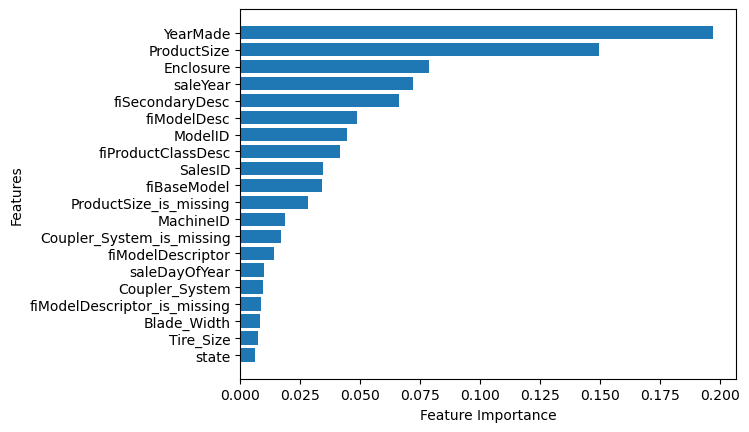

In [50]:
plot_features(X_train.columns, ideal_model.feature_importances_)